polynomial linear regression


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [133]:
x = 6 * np.random.rand(200,1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200,1)
 # y = 0.8^2 + 0.9x + 2

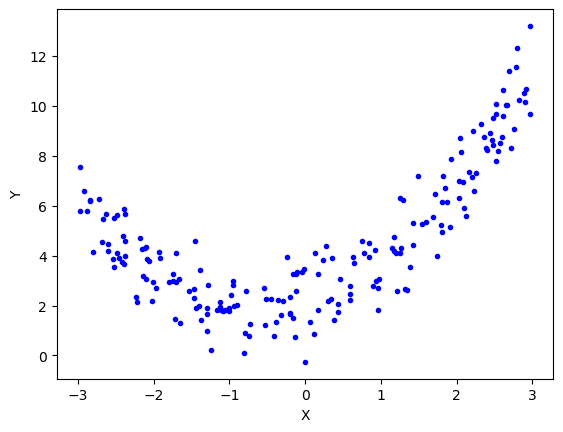

In [135]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [136]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [139]:
#applying linear regression
lr = LinearRegression()

In [141]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
y_pred = lr.predict(x_test)

In [145]:
r2_score(y_test,y_pred)

-0.04263795495202105

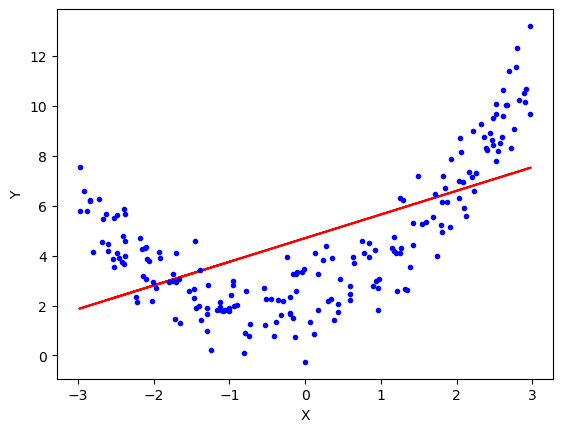

In [147]:
plt.plot(x_train,lr.predict(x_train),color = 'r')
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [148]:
lr.coef_

array([[0.94718291]])

In [151]:
lr.intercept_

array([4.70105447])

In [153]:
##Applying polynomila linear regression of degree 2

In [155]:
poly = PolynomialFeatures(degree = 2,include_bias = True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [157]:
print(x_train[0])
print(x_train_trans[0])

[-2.60109205]
[ 1.         -2.60109205  6.76567985]


In [159]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [161]:
y_pred = lr.predict(x_test_trans)

In [163]:
r2_score(y_test,y_pred)

0.8619966261847662

In [165]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85784792 0.74547409]]
[2.14687231]


In [167]:

x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

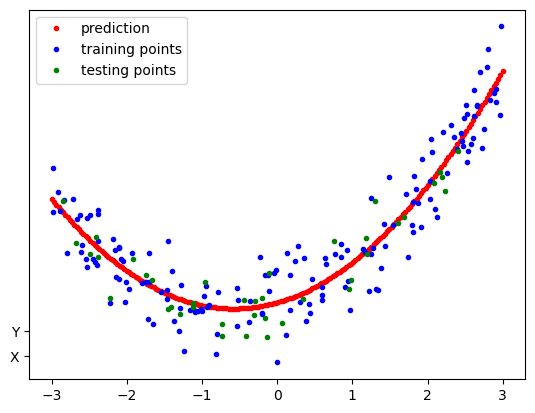

In [169]:
plt.plot(x_new,y_new,"r.",linewidth = 3, label = "prediction")
plt.plot(x_train,y_train,"b.",label = "training points")
plt.plot(x_test,y_test,"g.",label = "testing points")
plt.plot("X")
plt.plot("Y")
plt.legend()
plt.show()

In [171]:
#applying gradient descent

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


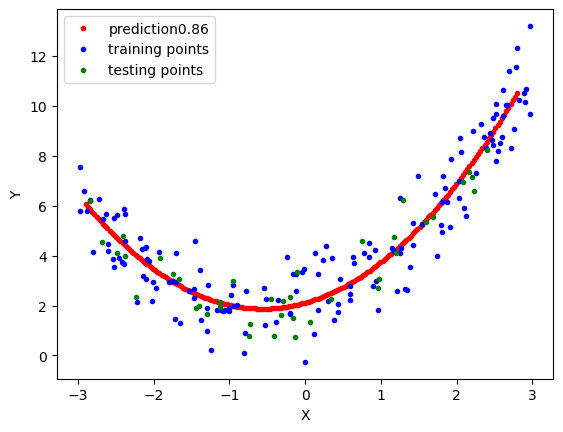

In [187]:
poly = PolynomialFeatures(degree =2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

sgd =SGDRegressor(max_iter = 100)
sgd.fit(x_train_trans,y_train)

x_new = np.linspace(-2.9,2.8,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = sgd.predict(x_new_poly)

y_pred=sgd.predict(x_test_trans)

plt.plot(x_new,y_new,"r.",linewidth =2, label = "prediction" + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train,y_train,"b.",label="training points")
plt.plot(x_test,y_test,"g.",label= "testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

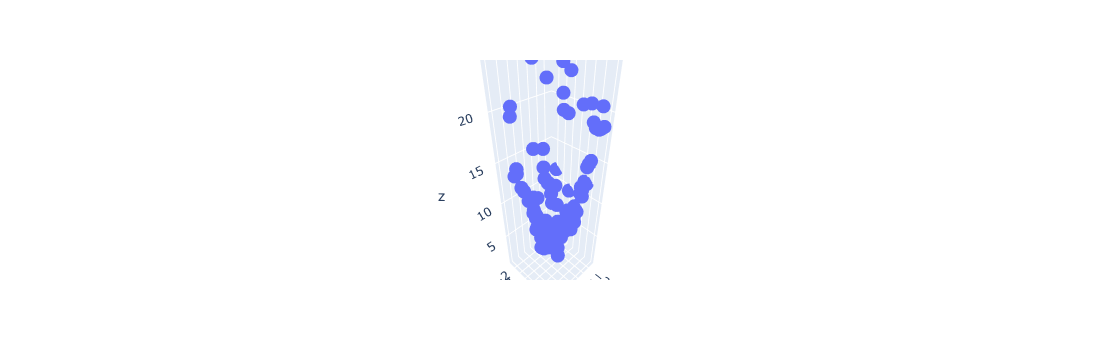

In [193]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)


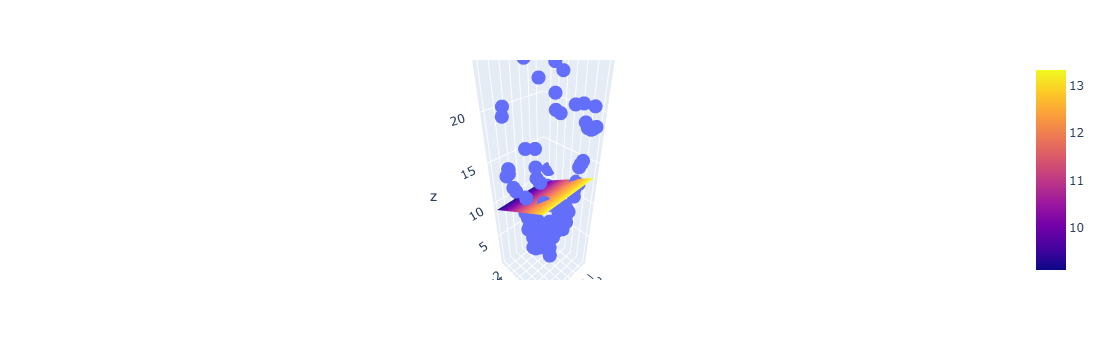

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [197]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape
(100, 2)
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)